In [1]:
import hcipy
import numpy as np
from hcipy.fourier.fourier_transform import _time_it
from hcipy._math import fft as fft_module
import matplotlib.pyplot as plt
from tqdm import tqdm

Ns = 2**np.linspace(4, 12, 9)#[64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
num_threads = [1, 2, 4, 8, 12, 16, 24]#[1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
t_max = 0.1

for _ in range(1):
    param_grid = hcipy.CartesianGrid(hcipy.SeparatedCoords((Ns, num_threads)))
    times = param_grid.empty()

    for i, (N, threads) in enumerate(tqdm(param_grid.points)):
        N = int(N)
        threads = int(threads)

        a = np.random.randn(N, N).astype('complex128')

        times[i] = _time_it(lambda: fft_module.fft2(a, threads=threads, method='scipy'), t_max=t_max)

100%|██████████| 63/63 [00:58<00:00,  1.08it/s]


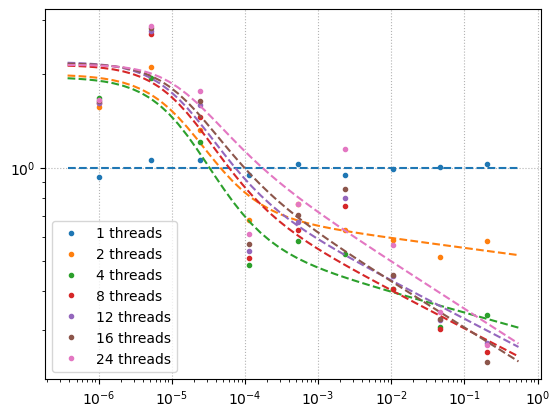

In [ ]:
complexities = Ns**2 * np.log2(Ns)

ref = None
ref_fit = None

fits = []

for i, threads in enumerate(num_threads):
    label = f'{threads} threads'
    x = complexities / 1e9
    y = times.shaped[i] * 1000

    _, f = hcipy.fit_fourier_performance_data(x, y)

    x_fit = np.exp(np.linspace(np.log(x).min() - 1, np.log(x).max() + 1))
    if ref is None:
        ref = f(x)
        ref_fit = f(x_fit)

    fits.append(ref_fit)

    plotted_data = plt.plot(x, y / ref, '.', label=label)
    c = plotted_data[0].get_color()

    plt.plot(x_fit, f(x_fit) / ref_fit, ls='--', c=c)
plt.xscale('log')
plt.yscale('log')
plt.grid(c='0.7', ls=':')
plt.legend()

In [5]:
fits

[array([1.22983246e-02, 1.23683865e-02, 1.24654506e-02, 1.25999239e-02,
        1.27862239e-02, 1.30443252e-02, 1.34019002e-02, 1.38972868e-02,
        1.45835984e-02, 1.55344187e-02, 1.68516909e-02, 1.86766479e-02,
        2.12049543e-02, 2.47076853e-02, 2.95603903e-02, 3.62833572e-02,
        4.55973963e-02, 5.85011228e-02, 7.63780239e-02, 1.01144791e-01,
        1.35456821e-01, 1.82992917e-01, 2.48849712e-01, 3.40088116e-01,
        4.66490355e-01, 6.41608786e-01, 8.84218924e-01, 1.22033248e+00,
        1.68598625e+00, 2.33110581e+00, 3.22485837e+00, 4.46306860e+00,
        6.17849257e+00, 8.55505137e+00, 1.18475504e+01, 1.64089985e+01,
        2.27284565e+01, 3.14834719e+01, 4.36127236e+01, 6.04166625e+01,
        8.36969416e+01, 1.15949582e+02, 1.60632585e+02, 2.22536690e+02,
        3.08299013e+02, 4.27114657e+02, 5.91722572e+02, 8.19771377e+02,
        1.13571158e+03, 1.57341705e+03])]